<a href="https://colab.research.google.com/github/tamayodb/CCMADMACL_EXERCISES_COM222ML/blob/main/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6

Netflix is the world's largest online streaming service provider, with over 220 million subscribers. It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscribers from ending their subscription.

We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences.

## Instructions

1. Your task is to group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other. Use Principal Component Analysis and any Clustering Algorithm.

2. After creating the clusters, profile each cluster that you have created.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXERCISES/blob/353cd84703a9e313ee7ecf37fb97a067aa81ddbc/netflix.csv?raw=true")

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [ ]:
X = df.drop(columns=['show_id'])

In [ ]:
categorical_cols = ['type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description']
numerical_cols = ['release_year']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [ ]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
X_preprocessed = preprocessor.fit_transform(X)

1. Apply dimensionality reduction using Principal Component Analysis
- Use the necessary number of principal components

In [ ]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_preprocessed)

print(f"Number of principal components: {pca.n_components_}")

Number of principal components: 10


2. Create a scree plot for each principal component

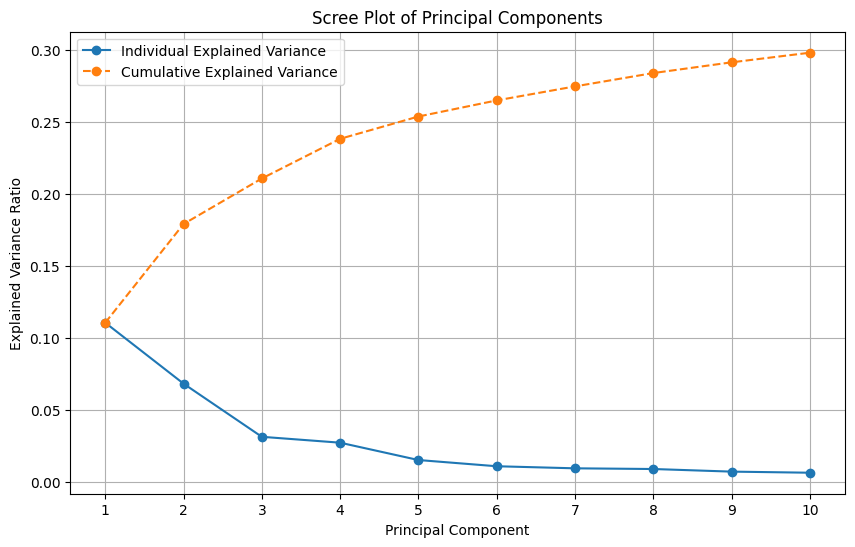

In [ ]:
import matplotlib.pyplot as plt

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', label='Cumulative Explained Variance')
plt.title('Scree Plot of Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_preprocessed)

print(f"Number of components: {pca.n_components_}")

Number of components: 3


3. Use any clustering algorithm to create clusters

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_pca)

print(df['cluster'].value_counts())

cluster
2    2551
1    2349
3    1912
0     765
4     210
Name: count, dtype: int64


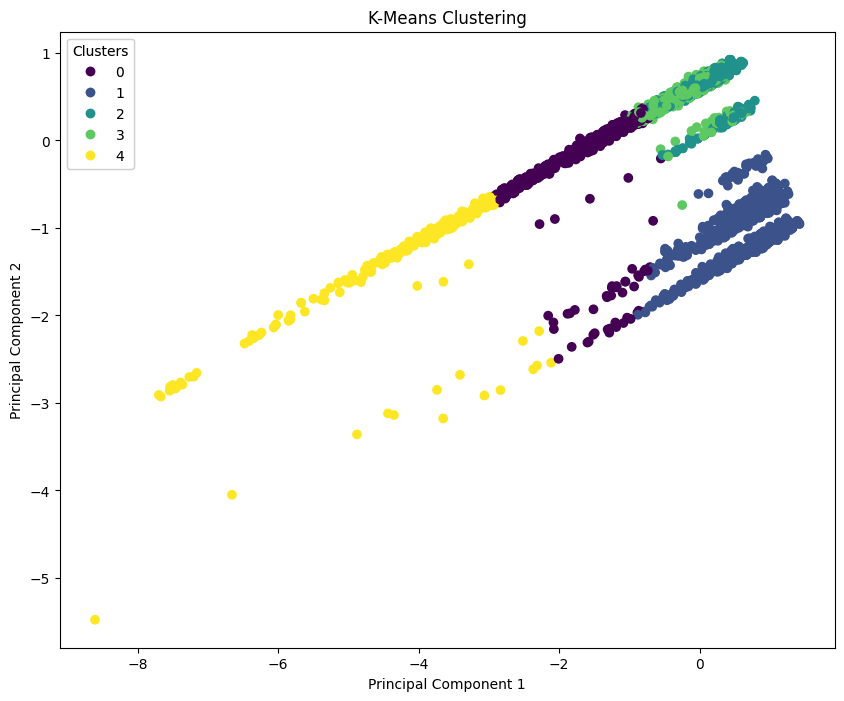

In [ ]:
# Plotting the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

legend = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend)
plt.show()

4. Profile each cluster that you have generated based on your experiments

In [ ]:
from tabulate import tabulate

for cluster_label in sorted(df['cluster'].unique()):
    print(f"\n{'='*50}\nCluster {cluster_label} Profile:\n{'='*50}")
    cluster_data = df[df['cluster'] == cluster_label]

    print("\nNumerical Features:")
    numerical_summary = cluster_data[numerical_cols].describe().transpose()  # Transpose for better readability
    print(tabulate(numerical_summary, headers='keys', tablefmt='pretty'))

    print("\nCategorical Features:")
    for col in categorical_cols:
        print(f"\n{col}:")
        categorical_summary = cluster_data[col].value_counts().head(10)  # Displaying top 10 categories
        print(tabulate(categorical_summary.items(), headers=[col, 'Count'], tablefmt='pretty'))
    print(f"{'='*50}")



Cluster 0 Profile:

Numerical Features:
+--------------+-------+-------------------+-------------------+--------+--------+--------+--------+--------+
|              | count |       mean        |        std        |  min   |  25%   |  50%   |  75%   |  max   |
+--------------+-------+-------------------+-------------------+--------+--------+--------+--------+--------+
| release_year | 765.0 | 2001.886274509804 | 5.614946615993949 | 1988.0 | 1998.0 | 2003.0 | 2006.0 | 2009.0 |
+--------------+-------+-------------------+-------------------+--------+--------+--------+--------+--------+

Categorical Features:

type:
+---------+-------+
|  type   | Count |
+---------+-------+
|  Movie  |  720  |
| TV Show |  45   |
+---------+-------+

title:
+----------------------------------------+-------+
|                 title                  | Count |
+----------------------------------------+-------+
|                   9                    |   1   |
|              Scary Movie               |   1 